In [2]:
#First we import the necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import shutil

# Upload file interactively
uploaded = files.upload()

# Move the uploaded file to /content/sample_data
for filename in uploaded.keys():
    shutil.move(filename, '/content/sample_data/' + filename)

print("File uploaded and moved to /content/sample_data/")


df = pd.read_csv('/content/sample_data/RTA Dataset.csv')


Saving RTA Dataset.csv to RTA Dataset.csv
File uploaded and moved to /content/sample_data/


Shape of the dataset: (12316, 32)

Missing Values:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_seve

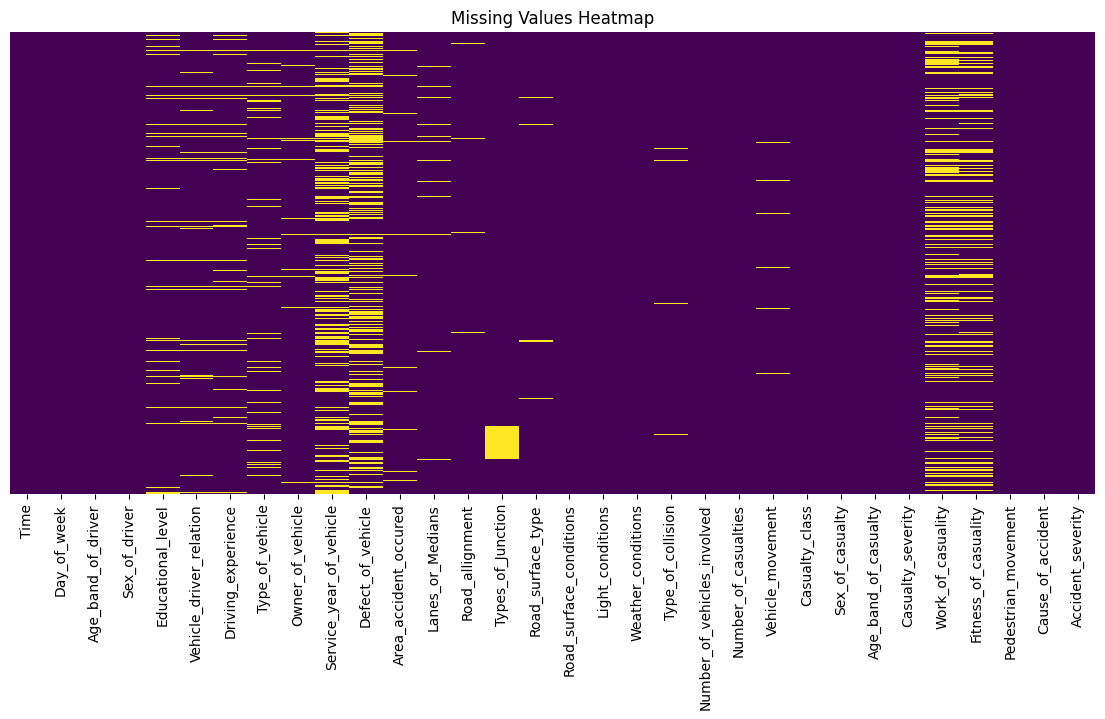

In [3]:
# We provide some general dataset info
print("Shape of the dataset:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [4]:
# Handling Missing Values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())



Missing values after cleaning:
0


In [5]:
# We then encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


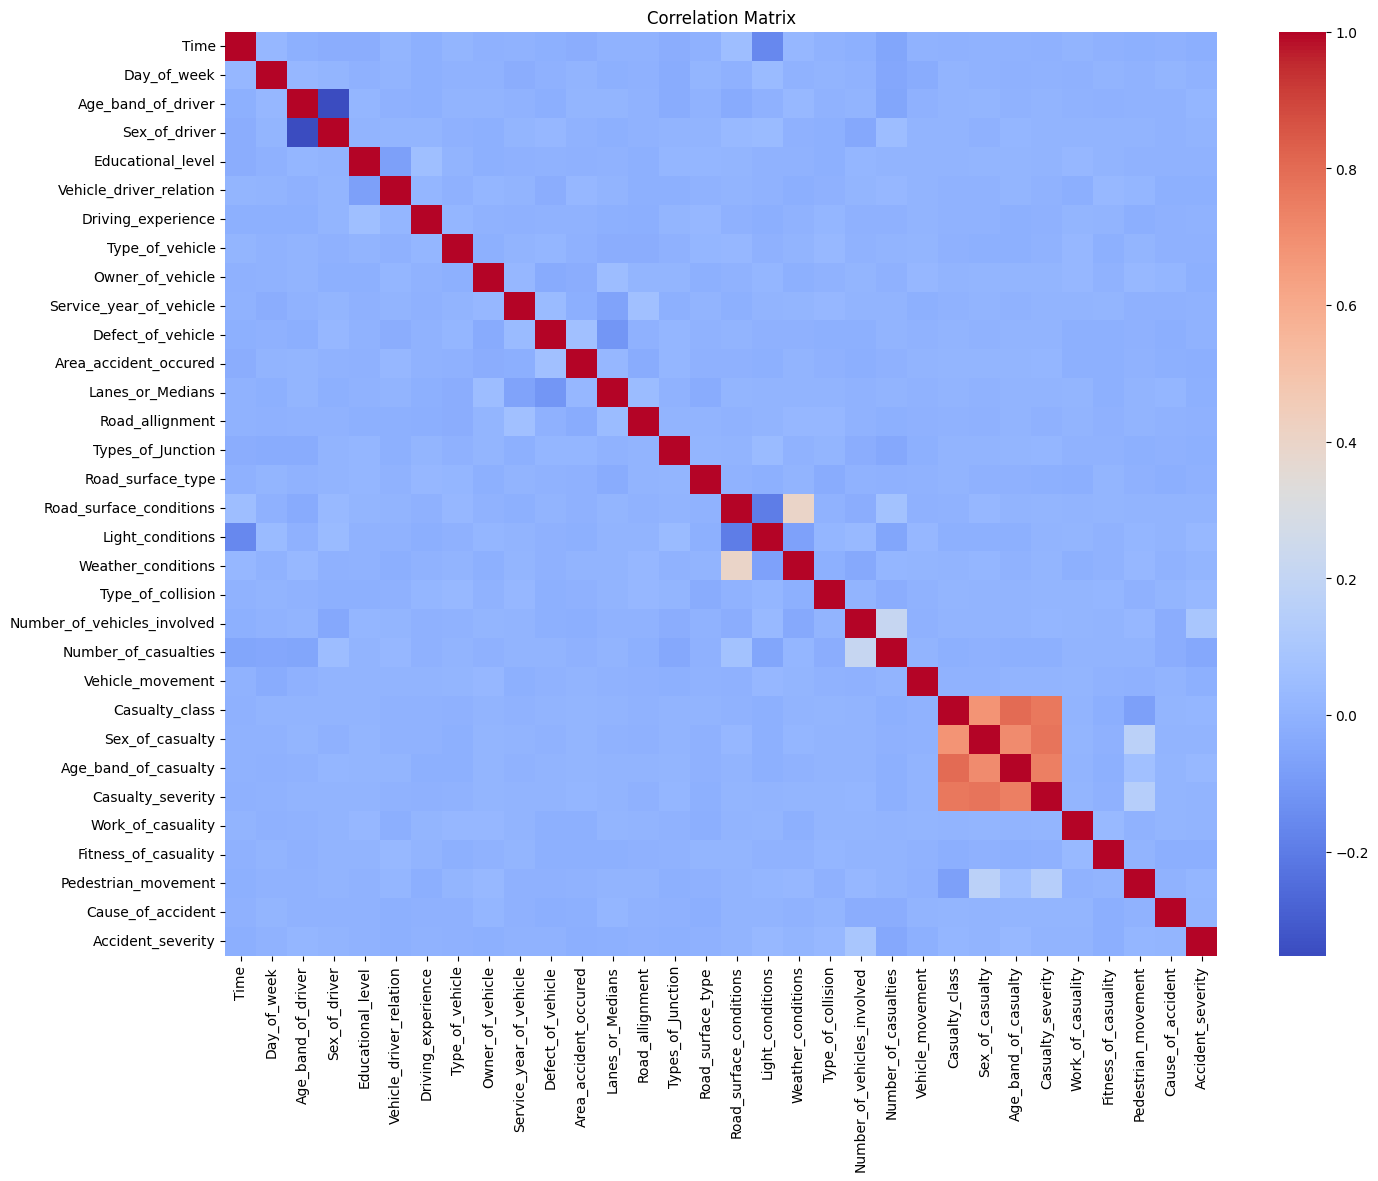

In [6]:
# Correlation Matrix
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


In [7]:
# Choosing PCA, Standardizing, PCA , train-test split
X = df.drop('Accident_severity', axis=1)  # <-- Update if your target column name differs
y = df['Accident_severity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNN Best CV Accuracy: 0.9336992895726424
KNN Test Accuracy: 0.7461434370771313

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.15      0.13        47
           1       0.20      0.21      0.20       523
           2       0.86      0.85      0.85      3125

    accuracy                           0.75      3695
   macro avg       0.39      0.40      0.39      3695
weighted avg       0.75      0.75      0.75      3695



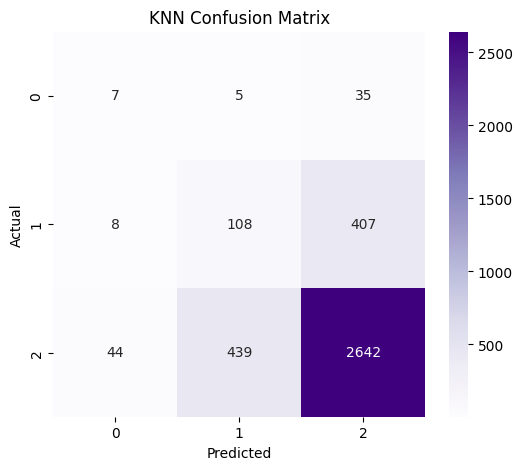

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 5. Define KNN and parameter grid
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],  # moderate range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']  # exclude 'cosine' to avoid high dimensional issues
}
# 6. Grid search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=4, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_bal, y_train_bal)

# 7. Best model
best_knn = grid_search_knn.best_estimator_

# 8. Predict & evaluate
y_pred_knn = best_knn.predict(X_test)

print("\nKNN Best Parameters:", grid_search_knn.best_params_)
print("KNN Best CV Accuracy:", grid_search_knn.best_score_)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# 9. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


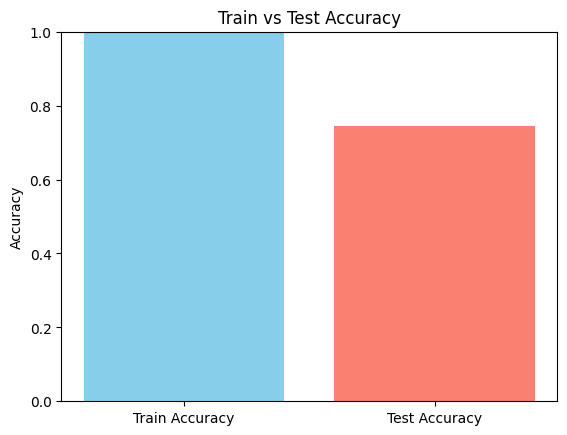

In [21]:
import numpy as np

# Convert y_train if needed
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Convert y_test if needed
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

train_acc = best_knn.score(X_train, y_train_labels)
test_acc = accuracy_score(y_test_labels, y_pred_knn)

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()


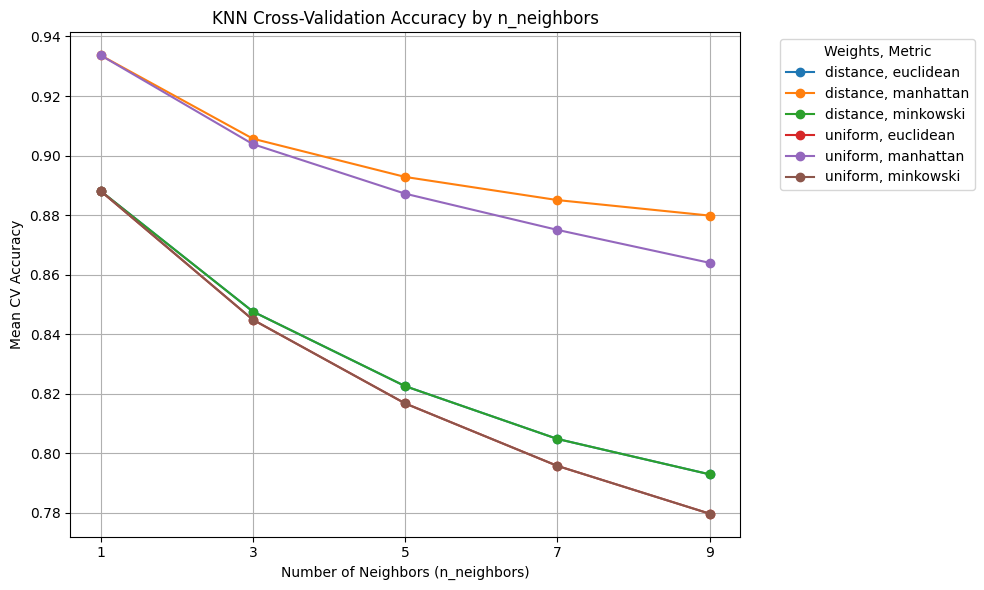

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert cv_results_ to DataFrame
results_knn = pd.DataFrame(grid_search_knn.cv_results_)

# Plot mean test accuracy against n_neighbors for each (weight, metric) pair
plt.figure(figsize=(10, 6))

# Group by weights and metrics
for (weight, metric), group in results_knn.groupby(['param_weights', 'param_metric']):
    plt.plot(group['param_n_neighbors'], group['mean_test_score'], marker='o', label=f'{weight}, {metric}')

plt.title("KNN Cross-Validation Accuracy by n_neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean CV Accuracy")
plt.xticks(param_grid_knn['n_neighbors'])
plt.legend(title="Weights, Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
pip install tensorflow


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# One-hot encode labels
y_encoded = to_categorical(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y
)

# Build model with more layers and neurons
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4638 - loss: 1.2370 - val_accuracy: 0.8441 - val_loss: 0.5866 - learning_rate: 0.0010
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8185 - loss: 0.5786 - val_accuracy: 0.8446 - val_loss: 0.4855 - learning_rate: 0.0010
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8317 - loss: 0.5270 - val_accuracy: 0.8446 - val_loss: 0.4707 - learning_rate: 0.0010
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8391 - loss: 0.4882 - val_accuracy: 0.8446 - val_loss: 0.4662 - learning_rate: 0.0010
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8439 - loss: 0.4744 - val_accuracy: 0.8429 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8457 - loss: 0.4581 - val_accuracy: 0.8452 - val_loss: 0.4605 - learning_rate: 0.0010
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8448 - los

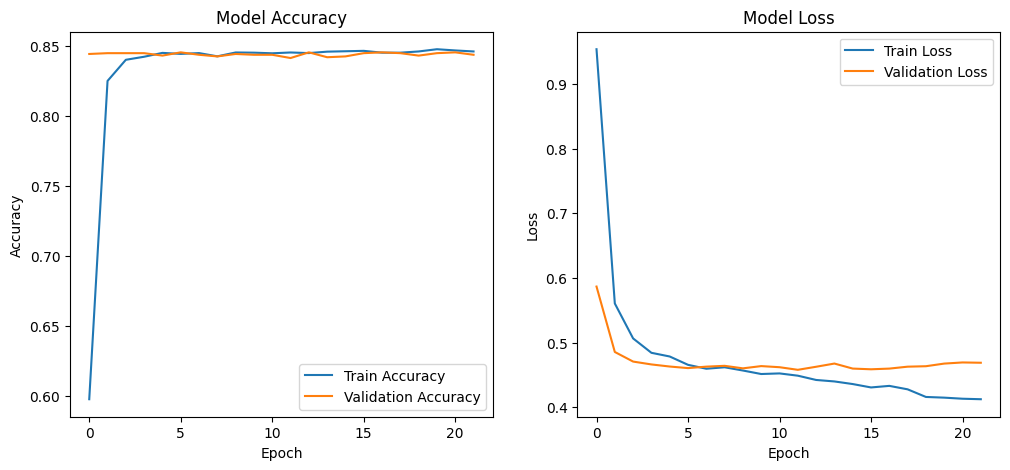

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.40      0.00      0.01       523
           2       0.85      1.00      0.92      3125

    accuracy                           0.85      3695
   macro avg       0.75      0.34      0.32      3695
weighted avg       0.79      0.85      0.78      3695



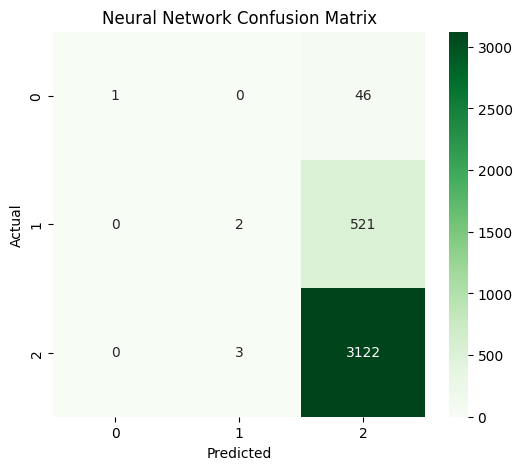

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels for test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
